In [12]:
# Regression
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt


In [13]:
# Load Data Sets
# mtcars data set
reg = pd.read_excel('rushi proj.xlsx')
reg.head()
reg.dtypes
reg.describe()
reg['Education'] = reg['Education'].astype('category', ordered = True)
reg['Attrition'] = reg['Attrition'].astype('category')
reg.head()
reg.dtypes`
reg.describe()


C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  import sys


,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [15]:
X_R1 = reg['JobLevel']
y_R1 = reg['MonthlyIncome']

linreg = LinearRegression().fit(np.array(X_R1).reshape(-1,1), y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (b1): {}".format(linreg.coef_))

linear model intercept (b0): -1839.0143848186508
linear model coeff (b1): [4041.74691684]


<IPython.core.display.Javascript object>


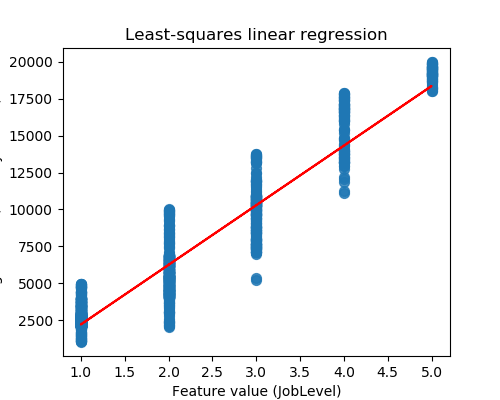

In [16]:
# Linear Regression: plot
plt.figure(figsize = (5,4))
plt.scatter(X_R1, y_R1, marker = 'o', s=50, alpha = 0.8)
plt.plot(X_R1, linreg.coef_*X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (JobLevel)')
plt.ylabel('Target value (MonthlyIncome)')
plt.show()


In [17]:
TSS = np.sum((y_R1 - np.mean(y_R1))**2)
RSS =  np.sum((reg['MonthlyIncome'] - (linreg.coef_*reg['JobLevel'] + linreg.intercept_))**2)
RSS = linreg._residues
R2 = (TSS - RSS)/TSS
R2 = linreg.score(np.array(X_R1).reshape(-1,1), y_R1)


In [18]:
y_pred = linreg.predict(np.array(X_R1).reshape(-1,1))
R2 = r2_score(y_R1, y_pred)
n = (np.array(X_R1).reshape(-1,1)).shape[0]
p = (np.array(X_R1).reshape(-1,1)).shape[1]
adj_R2 = 1 - ((RSS/(n-p-1))/(TSS/(n-1)))
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)


In [19]:
MSE = RSS/n
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list = [RSS]
R2_list = [R2]
adjR2_list = [adj_R2]
RSE_list = [RSE]
model_list = ['[JobLevel ]']


TSS:  32560175038.060547
RSS:  3156060190.2250667
R-squared:  0.9030699255598026
Adjusted R-squared:  0.9030038968987397
RSE:  1466.255353522604


In [20]:
# New Predition
linreg.predict(np.array([3,2,4]).reshape(-1,1))

array([10286.22636569,  6244.47944886, 14327.97328253])

In [21]:
# Two predictors Age','PercentSalaryHike
X_R1 = reg[['Age','PercentSalaryHike']]
y_R1 = reg['MonthlyIncome']

linreg = LinearRegression().fit(X_R1, y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (b1): {}".format(linreg.coef_))

RSS =  np.sum((reg['MonthlyIncome'] - (linreg.coef_[0]*reg['Age'] + linreg.coef_[1]*reg['PercentSalaryHike'] + linreg.intercept_))**2)
RSS = linreg._residues
R2 = linreg.score(X_R1, y_R1)
n = X_R1.shape[0]
p = X_R1.shape[1]
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)

y_pred = linreg.predict(X_R1)
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list.append(RSS)
R2_list.append(R2)
adjR2_list.append(adjR2)
RSE_list.append(RSE)
model_list.append('Age','PercentSalaryHike')

linear model intercept (b0): -2403.778446160497
linear model coeff (b1): [256.62609394 -37.40441054]
TSS:  32560175038.060547
RSS:  24462306902.3297
R-squared:  0.24870468682262947
Adjusted R-squared:  0.9030038968987397
RSE:  4083.510233831786


TypeError: append() takes exactly one argument (2 given)

In [22]:
# New Predition
linreg.predict(np.array([[23,12],[32,15],[40,9]]))

array([3049.7687879 , 5247.19040171, 7524.62561648])

In [23]:
# Three predictors mpg ~ cyl33
X_R1 = pd.get_dummies(reg['Education'])
y_R1 = reg['MonthlyIncome']

linreg = LinearRegression().fit(X_R1, y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (b1): {}".format(linreg.coef_))

RSS = linreg._residues
y_pred = linreg.predict(X_R1)
R2 = linreg.score(X_R1, y_R1)
n = X_R1.shape[0]
p = X_R1.shape[1]
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list.append(RSS)
R2_list.append(R2)
adjR2_list.append(adjR2)
RSE_list.append(RSE)
model_list.append('[Education]')

linear model intercept (b0): 5.470232441979067e+16
linear model coeff (b1): [-5.47023244e+16 -5.47023244e+16 -5.47023244e+16 -5.47023244e+16
 -5.47023244e+16]
TSS:  32560175038.060547
RSS:  32214924100.938797
R-squared:  0.010467932456202478
Adjusted R-squared:  0.9030038968987397
RSE:  4690.919907346957


In [24]:
X_R1.head(8)
#100000  01000  00100

,1,2,3,4,5
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,1,0,0,0,0
5,0,1,0,0,0
6,0,0,1,0,0
7,1,0,0,0,0


In [14]:
# New Predition
linreg.predict(np.array([[0,1,0,0,0],[1,0,0,0,0],[0,0,1,0,0]]))


array([6192., 5592., 6544.])

In [15]:
# Three predictors mpg ~ wt + hp + cyl
# Model 1 - mpg ~ wt + hp +cyl
X_R1 = reg[['Age','JobLevel', 'PercentSalaryHike']]
dummyCols = pd.get_dummies(reg['JobLevel'])
X_R1 = X_R1.join(dummyCols)
y_R1 = reg['MonthlyIncome']

linreg = LinearRegression().fit(X_R1, y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (b1): {}".format(linreg.coef_))

RSS = linreg._residues
R2 = linreg.score(X_R1, y_R1)
n = X_R1.shape[0]
p = X_R1.shape[1]
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)

y_pred = linreg.predict(X_R1)
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list.append(RSS)
R2_list.append(R2)
adjR2_list.append(adjR2)
RSE_list.append(RSE)
model_list.append('[Age,JobLevel,PercentSalaryHike]')


linear model intercept (b0): -1394.7855090940684
linear model coeff (b1): [    5.61159666  3871.97385603     7.27905       15.79951087
 -1162.9504636   -739.45824196  1032.59597522   854.01321947]
TSS:  32560175038.060547
RSS:  []
R-squared:  0.9253223780457479
Adjusted R-squared:  0.9030038968987397
RSE:  []


In [16]:
X_R1.head(10)

,Age,JobLevel,PercentSalaryHike,1,2,3,4,5
0,41,2,11,0,1,0,0,0
1,49,2,23,0,1,0,0,0
2,37,1,15,1,0,0,0,0
3,33,1,11,1,0,0,0,0
4,27,1,12,1,0,0,0,0
5,32,1,13,1,0,0,0,0
6,59,1,20,1,0,0,0,0
7,30,1,22,1,0,0,0,0
8,38,3,21,0,0,1,0,0
9,36,2,13,0,1,0,0,0


In [17]:

#slr model 1

linear model intercept (b0): 1227.9352878466261
linear model coeff (b1): [467.65841185]


<IPython.core.display.Javascript object>


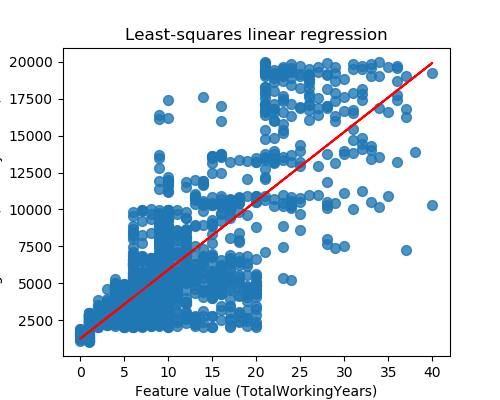

TSS:  32560175038.060547
RSS:  13109899609.991552
R-squared:  0.5973639701055966
Adjusted R-squared:  0.9030038968987397
RSE:  2988.3857390918133


In [18]:
#slr model 1
#TotalWorkingYears
X_R1 = reg['TotalWorkingYears']
y_R1 = reg['MonthlyIncome']

linreg = LinearRegression().fit(np.array(X_R1).reshape(-1,1), y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (b1): {}".format(linreg.coef_))

# Linear Regression: plot
plt.figure(figsize = (5,4))
plt.scatter(X_R1, y_R1, marker = 'o', s=50, alpha = 0.8)
plt.plot(X_R1, linreg.coef_*X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (TotalWorkingYears)')
plt.ylabel('Target value (MonthlyIncome)')
plt.show()

RSS = linreg._residues
R2 = linreg.score(np.array(X_R1).reshape(-1,1), y_R1)
n = (np.array(X_R1).reshape(-1,1)).shape[0]
p = (np.array(X_R1).reshape(-1,1)).shape[1]
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)

y_pred = linreg.predict(np.array(X_R1).reshape(-1,1))
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list.append(RSS)
R2_list.append(R2)
adjR2_list.append(adjR2)
RSE_list.append(RSE)
model_list.append('[TotalWorkingYears]')

In [ ]:
# New Predition
linreg.predict(np.array([9,2,15]).reshape(-1,1))

In [19]:
#TotalWorkingYears,Monthly income
X_R1 = reg['TotalWorkingYears']
y_R1 = reg['MonthlyIncome']

X_R1 = np.vstack((X_R1, X_R1**2)).T
linreg = LinearRegression().fit(X_R1, y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (b1): {}".format(linreg.coef_))

RSS = linreg._residues
R2 = linreg.score(X_R1, y_R1)
n = X_R1.shape[0]
p = X_R1.shape[1]
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)

y_pred = linreg.predict(X_R1)
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list.append(RSS)
R2_list.append(R2)
adjR2_list.append(adjR2)
RSE_list.append(RSE)
model_list.append('[TotalWorkingYears,TotalWorkingYears]')

linear model intercept (b0): 1531.9815537440418
linear model coeff (b1): [409.96814166   1.84668978]
TSS:  32560175038.060547
RSS:  13079338921.258343
R-squared:  0.5983025611511756
Adjusted R-squared:  0.9030038968987397
RSE:  2985.9177460428878


In [20]:
# New Predition
linreg.predict(np.array([[100,100**2],[200,200**2],[300, 300**2]]))


array([ 60995.69354517, 157393.20118669, 290724.50447831])

In [21]:
#===========================TotalWorkingYears,TotalWorkingYears2,TotalWorkingYears3=====================
X_R1 = reg['TotalWorkingYears']
y_R1 = reg['MonthlyIncome']

X_R1 = np.vstack((X_R1, X_R1**2, X_R1**3)).T
linreg = LinearRegression().fit(X_R1, y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (b1): {}".format(linreg.coef_))

RSS = linreg._residues
R2 = linreg.score(X_R1, y_R1)
n = X_R1.shape[0]
p = X_R1.shape[1]
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)

y_pred = linreg.predict(X_R1)
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list.append(RSS)
R2_list.append(R2)
adjR2_list.append(adjR2)
RSE_list.append(RSE)
model_list.append('[TotalWorkingYears,TotalWorkingYears2,TotalWorkingYears3]')



linear model intercept (b0): 2659.2289583560005
linear model coeff (b1): [39.87377919 30.00810796 -0.55881258]
TSS:  32560175038.060547
RSS:  12762273971.910664
R-squared:  0.6080403757967374
Adjusted R-squared:  0.9030038968987397
RSE:  2950.5096990605048


In [22]:
# New Predition
linreg.predict(np.array([[100,100**2,100**3],[200,200**2,200**3],[300, 300**2,300**3]]))

array([  -252084.89497725,  -3259542.34837178, -12372588.6198497 ])

In [23]:
#==================Age,total year,Age1,total year1,Age*total age=====================
from sklearn.preprocessing import PolynomialFeatures
X_R1 = reg[['TotalWorkingYears','Age']]
y_R1 = reg['MonthlyIncome']

poly = PolynomialFeatures(degree=2, include_bias = False)
X_R1 = poly.fit_transform(X_R1)

linreg = LinearRegression().fit(X_R1, y_R1)
print("linear model intercept (b0): {}".format(linreg.intercept_))
print("linear model coeff (bn): {}".format(linreg.coef_))

RSS = linreg._residues
R2 = linreg.score(X_R1, y_R1)
n = X_R1.shape[0]
p = X_R1.shape[1]
adjR2 = 1 - (1-R2)*(n-1)/(n-p-1)

y_pred = linreg.predict(X_R1)
MSE = mean_squared_error(y_R1, y_pred)
RSE = np.sqrt(RSS/(n-p-1))

print('TSS: ', TSS)
print('RSS: ', RSS)
print('R-squared: ', R2)
print('Adjusted R-squared: ', adj_R2)
print('RSE: ', RSE)

RSS_list.append(RSS)
R2_list.append(R2)
adjR2_list.append(adjR2)
RSE_list.append(RSE)
model_list.append('[Age,total year,Age1,total year1,Age*total age]')



linear model intercept (b0): -501.6828187991532
linear model coeff (bn): [403.71948208 131.87292935   3.26915664  -0.4173299   -1.96172776]
TSS:  32560175038.060547
RSS:  12989603067.641245
R-squared:  0.601058561495529
Adjusted R-squared:  0.9030038968987397
RSE:  2978.7043644866435


In [24]:
# New Predition
linreg.predict(np.array([[3,250,3**2,3*250,250**2],[2,150,2**2,2*150,150**2],[4,350,4**2,4*350,350**2]]))


array([ -89213.85186524,  -24164.30132888, -193574.8852092 ])

In [1]:
#============================================================================
# RIDGE REGRESSION AND LASSO
#============================================================================
# Import libraries
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

# Regression, ridge and lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
# Hitters dataset
reg = pd.read_excel('rushi proj.xlsx')
reg.head()

#reg['JobLevel'] = reg['JobLevel'].astype('category')
#reg['Attrition'] = reg['Attrition'].astype('category')
#reg['RelationshipSatisfaction'] = reg['RelationshipSatisfaction'].astype('category')
reg.head()
reg.dtypes
reg.describe()
#reg['MonthlyIncome'] = pd.cut(reg['MonthlyIncome'],3, labels = ['L','M','H'])
print(reg.head())
print(reg.dtypes)
print(reg.describe())


   Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0

In [22]:
# Create training and test dataset
y = reg['MonthlyIncome']
X = reg.iloc[:,0:1]
X1 = reg.iloc[:,3]
X2 = reg.iloc[:,5:6]
X3 = reg.iloc[:,8:10]
X4 = reg.iloc[:,12:14]
X5 = reg.iloc[:,16]
X6 = reg.iloc[:,18:20]
X7=reg.iloc[:,23:35]
Gender = pd.get_dummies(reg['Gender'])
MaritalStatus = pd.get_dummies(reg['MaritalStatus'])

EducationField = pd.get_dummies(reg['EducationField'])
JobRole = pd.get_dummies(reg['JobRole'])
BusinessTravel = pd.get_dummies(reg['BusinessTravel'])
Department = pd.get_dummies(reg['Department'])
#MonthlyIncome = pd.get_dummies(reg['MonthlyIncome'])


In [23]:


OverTime = pd.get_dummies(reg['OverTime'])

In [24]:
X = pd.concat([X,X1,X2,X3,X4,X5,X6,X7,Gender,MaritalStatus,OverTime,EducationField,JobRole,BusinessTravel,Department],sort = False, axis = 1)
print(X.shape)
X.head()

(1470, 50)


,Attrition,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,Research Director,Research Scientist,Sales Executive,Sales Representative,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,1,1102,1,1,1,94,3,4,5993,19479,...,0,0,1,0,0,0,1,0,0,1
1,0,279,8,1,2,61,2,2,5130,24907,...,0,1,0,0,0,1,0,0,1,0
2,1,1373,2,1,4,92,2,3,2090,2396,...,0,0,0,0,0,0,1,0,1,0
3,0,1392,3,1,5,56,3,3,2909,23159,...,0,1,0,0,0,1,0,0,1,0
4,0,591,2,1,7,40,3,2,3468,16632,...,0,0,0,0,0,0,1,0,1,0


In [32]:
X.dtypes

Attrition                    int64
DailyRate                    int64
DistanceFromHome             int64
EmployeeCount                int64
EmployeeNumber               int64
HourlyRate                   int64
JobInvolvement               int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Female                       uint8
Male                         uint8
Divorced                     uint8
Married                      uint8
Single                       uint8
No                           uint8
Yes                 

In [41]:
print(X.columns)

Index(['Attrition', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Female', 'Male',
       'Divorced', 'Married', 'Single', 'No', 'Yes', 'Human Resources',
       'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Human Resources',
       'Research & Development', 'Sales', 'L', 'M'

In [1]:
# Splitting X and y into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# random_state parameter provides seed value to internal random
# number generator function
# default 75% - 25% partitioning of data into Training and Test data set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'train_test_split' is not defined

In [27]:
print(reg.head())

   Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0

In [28]:
X.dtypes

Attrition                    int64
DailyRate                    int64
DistanceFromHome             int64
EmployeeCount                int64
EmployeeNumber               int64
HourlyRate                   int64
JobInvolvement               int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Female                       uint8
Male                         uint8
Divorced                     uint8
Married                      uint8
Single                       uint8
No                           uint8
Yes                 

In [31]:
reg

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,0,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,0,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,0,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,0,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,0,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [29]:
# Ridge Regression and Lasso
#Default alpha = 1.0
linridge = Ridge().fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
    .format(linridge.intercept_))
print('ridge regression linear model coeff: {}'
    .format(linridge.coef_))
print('R-squared score (train): {:.3f}'
    .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
    .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
    .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 2.0324450815678574e-06
ridge regression linear model coeff: [-1.17353885e-08  3.07901191e-11  1.04398004e-09  0.00000000e+00
  4.04302501e-11  5.11635917e-10 -7.00699843e-08  7.25062379e-09
  1.00000000e+00 -1.53989837e-12  1.08523012e-08 -1.44875572e-07
 -6.72337408e-09  0.00000000e+00 -1.41012095e-08  6.56417467e-08
 -6.17102218e-09  1.67505825e-08  1.48933441e-08 -7.90861490e-09
  1.65269822e-08 -2.08029493e-08 -2.05463866e-08  2.05376327e-08
 -4.32348470e-09 -1.19636396e-08  1.62045877e-08 -2.16173224e-08
  2.16173224e-08  1.03783293e-08 -3.80201388e-09  2.46960412e-08
 -4.20309611e-08 -2.12492970e-08  3.22415465e-08 -2.49126790e-07
 -8.35435072e-07 -1.17422827e-06  2.31127190e-06 -1.51835407e-07
  2.17454374e-06 -1.21092624e-06  7.08271090e-08 -9.36880856e-07
 -4.91193493e-08  3.02153188e-08  1.89313154e-08  5.34770270e-08
  1.22237961e-07 -1.75845955e-07]
R-squared score (train): 1.000
R-squared score (test): 1.000
Number of non-zero featu

In [33]:
# fit and transform - min-max scaling
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#clf = Ridge().fit(X_train_scaled, y_train)

# It can be ore efficient to do fitting and transforming together
# on the training set using the fit_transform method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Default alpha = 1.0
linridge = Ridge().fit(X_train_scaled, y_train)

In [34]:
#linridge = Ridge(alpha = 20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept-scaled: {}'
    .format(linridge.intercept_))
print('ridge regression linear model coeff-scaled: {}'
    .format(linridge.coef_))
print('R-squared score (train-scaled): {:.3f}'
    .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test-scaled): {:.3f}'
    .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features-scaled: {}'
    .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept-scaled: 1443.9301867928261
ridge regression linear model coeff-scaled: [-4.00067724e+00  1.36686841e+01  9.19732978e+00  0.00000000e+00
  2.64177813e+01  1.15705615e+01 -6.64120420e+01  7.16444854e+00
  1.69925092e+04 -1.14703720e+01  4.69586768e+01 -4.52780649e+01
 -5.60393224e+00  0.00000000e+00 -1.47717680e+01  7.89338910e+02
 -1.28780090e+01  1.54359954e+01  1.78996672e+02 -3.71445206e+01
  7.92675992e+01 -9.85010365e+01 -6.49673319e+00  6.49673319e+00
 -1.06601440e+00 -3.54089100e+00  4.60690540e+00 -6.93602613e+00
  6.93602613e+00  1.30629293e+00 -1.39743139e+00  8.63312974e+00
 -1.26593285e+01 -6.55040780e+00  1.06677450e+01 -7.63407073e+01
 -2.71503088e+02 -3.73945183e+02  7.40892253e+02 -4.77256566e+01
  6.94680696e+02 -3.85328367e+02  2.08459772e+01 -3.01575925e+02
 -1.64872432e+01  1.01385312e+01  6.34871199e+00  2.10036908e+01
  3.62783481e+01 -5.72820389e+01]
R-squared score (train-scaled): 0.999
R-squared score (test-scaled): 0.999


In [35]:
# Ridge Regression Effect of alpha
print('Ridge regression: effect of alpha regularization parameter\n')
r2_train_list = list()
r2_test_list = list()
alpha_list = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 10, 20, 50, 100]
for myalpha in alpha_list:
    linridge = Ridge(alpha = myalpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_)>1.0)
    print('Alpha = {:.2f}\n\
    num abs(coeff) > 1.0: {}, \
    r-squared training: {:.4f}, r-squared test: {:.4f}\n'
    .format(myalpha, num_coeff_bigger, r2_train, r2_test))


Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
    num abs(coeff) > 1.0: 31,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 0.50
    num abs(coeff) > 1.0: 45,     r-squared training: 0.9996, r-squared test: 0.9996

Alpha = 1.00
    num abs(coeff) > 1.0: 48,     r-squared training: 0.9987, r-squared test: 0.9986

Alpha = 1.50
    num abs(coeff) > 1.0: 48,     r-squared training: 0.9975, r-squared test: 0.9972

Alpha = 2.00
    num abs(coeff) > 1.0: 48,     r-squared training: 0.9962, r-squared test: 0.9957

Alpha = 3.00
    num abs(coeff) > 1.0: 47,     r-squared training: 0.9933, r-squared test: 0.9926

Alpha = 4.00
    num abs(coeff) > 1.0: 47,     r-squared training: 0.9904, r-squared test: 0.9895

Alpha = 5.00
    num abs(coeff) > 1.0: 48,     r-squared training: 0.9877, r-squared test: 0.9866

Alpha = 10.00
    num abs(coeff) > 1.0: 47,     r-squared training: 0.9761, r-squared test: 0.9746

Alpha = 20.00
    num abs(coeff) > 1.0: 48,     

<IPython.core.display.Javascript object>


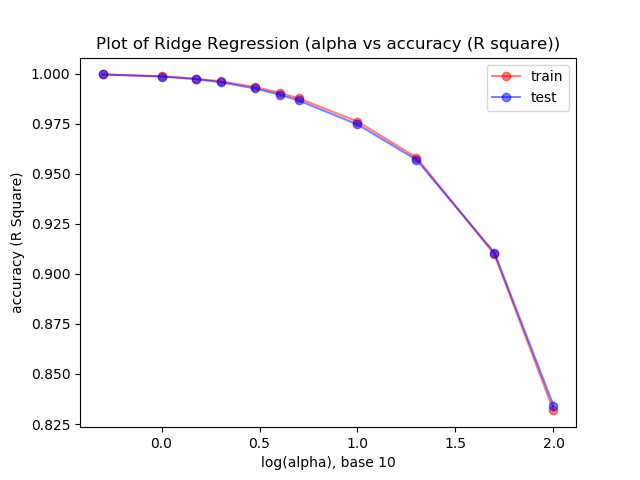

C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [36]:
# Plot of Ridge Regression (alpha vs R-square)
plt.figure()
plt.plot(np.log10(alpha_list), r2_train_list, 'ro-', alpha = 0.5, )
plt.plot(np.log10(alpha_list), r2_test_list, 'bo-', alpha = 0.5, )
plt.title('Plot of Ridge Regression (alpha vs accuracy (R square))')
plt.ylabel('accuracy (R Square)')
plt.xlabel('log(alpha), base 10')
plt.legend (['train', 'test'])



<IPython.core.display.Javascript object>


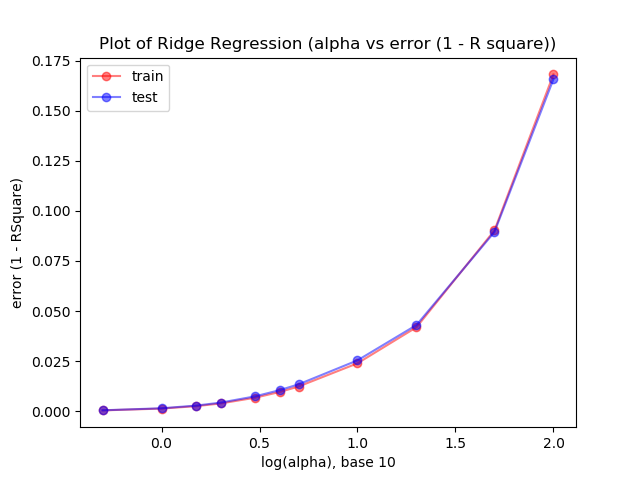

C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [37]:
# Plot of Ridge Regression (alpha vs R-square)
plt.figure()
plt.plot(np.log10(alpha_list), 1 - np.array(r2_train_list), 'ro-', alpha = 0.5, )
plt.plot(np.log10(alpha_list), 1 - np.array(r2_test_list), 'bo-', alpha = 0.5, )
plt.title('Plot of Ridge Regression (alpha vs error (1 - R square))')
plt.ylabel('error (1 - RSquare)')
plt.xlabel('log(alpha), base 10')
plt.legend (['train', 'test'])
plt.legend (['train', 'test'])

In [38]:
# Lasso Regression
scaler = MinMaxScaler()
# Split the dataset to train and test set in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70,
                                            test_size = 0.30, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#
linlasso = Lasso(alpha=2.0).fit(X_train_scaled, y_train)


In [39]:
print('lasso regression linear model intercept: {}'
    .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n {}'
    .format(linlasso.coef_))
print('Number of non-zero features: {}'
    .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.4f}'
    .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.4f}'
    .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')


lasso regression linear model intercept: 1018.2128140428849
lasso regression linear model coeff:
 [   -0.             0.            -0.             0.
     0.            -0.            -0.             0.
 18957.93392177     0.            -0.            -0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.            -0.
     0.             0.            -0.            -0.
     0.             0.             0.             0.
     0.            -0.            -0.             0.
    -0.            -0.             0.             0.
     0.            -0.             0.            -0.
    -0.            -0.             0.             0.
    -0.             0.        ]
Number of non-zero features: 1
R-squared score (training): 1.0000
R-squared score (test): 1.0000
Features with non-zero weight (sorted by absolute magnitude):


In [40]:
for e in sorted(list(zip(list(X),linlasso.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0],e[1]))



	MonthlyIncome, 18957.934


In [41]:
# Lasso - multiple alpha
print('Lasso regression: effect of alpha regularization parameter\n')
r2_train_list = list()
r2_test_list = list()
alpha_list = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 10, 20, 50, 100]



Lasso regression: effect of alpha regularization parameter



In [42]:
for myalpha in alpha_list:
    linlasso = Lasso(alpha = myalpha).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    print('Alpha = {:.2f}\n\
    Features kept: {}, \
    r-squared training: {:.4f}, r-squared test: {:.4f}\n'
    .format(myalpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))


C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Alpha = 0.00
    Features kept: 48,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 0.50
    Features kept: 1,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 1.00
    Features kept: 1,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 1.50
    Features kept: 1,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 2.00
    Features kept: 1,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 3.00
    Features kept: 1,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 4.00
    Features kept: 1,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 5.00
    Features kept: 1,     r-squared training: 1.0000, r-squared test: 1.0000

Alpha = 10.00
    Features kept: 1,     r-squared training: 0.9999, r-squared test: 0.9999

Alpha = 20.00
    Features kept: 1,     r-squared training: 0.9997, r-squared test: 0.9997

Alpha = 50.00
    Features kept: 1,     r-squared training: 0.9982, r-squared test: 0.9

<IPython.core.display.Javascript object>


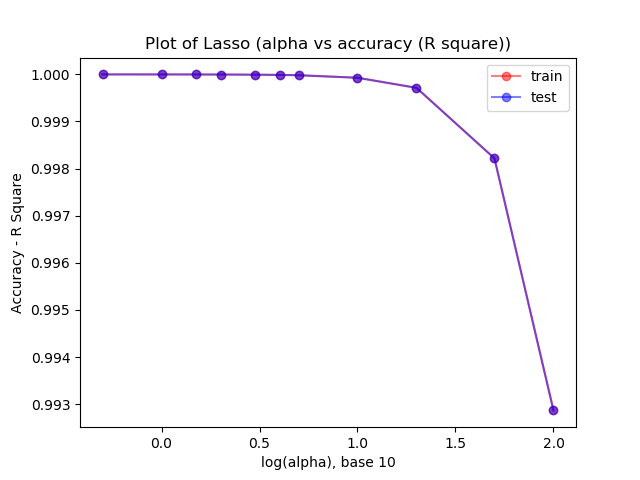

C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Windows 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [43]:
# Plot of Lasso (alpha vs R-square)
plt.figure()
plt.plot(np.log10(alpha_list), r2_train_list, 'ro-', alpha = 0.5, )
plt.plot(np.log10(alpha_list), r2_test_list, 'bo-', alpha = 0.5, )
plt.title('Plot of Lasso (alpha vs accuracy (R square))')
plt.ylabel('Accuracy - R Square')
plt.xlabel('log(alpha), base 10')
plt.legend (['train', 'test'])



In [48]:
# Time Series
# Load data
tser = pd.read_excel('rushi proj.xlsx')
tser.index = pd.DatetimeIndex(freq = "m", start = 0, periods = 1470)
tser.head()




,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1970-01-31,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1970-02-28,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
1970-03-31,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
1970-04-30,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
1970-05-31,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
